In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
import cv2
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D,Activation,Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

import os


In [6]:
directory=r"C:\Users\hp\OneDrive\Desktop\SPS"
print(os.listdir(directory))

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']


In [13]:
dataset=[]
mapping={"paper":0,"rock":1,"scissors":2}
count=0
for file in os.listdir(directory):
    if file=='README_rpc-cv-images.txt':
        continue
    path=os.path.join(directory,file)
    if not os.listdir(path):
            continue
    for im in os.listdir(path):
        if im.startswith('.'):
            continue
        image=cv2.imread(os.path.join(path,im))
#         print(image)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(150,150))
        image=image/255.0
#         print(image)
        dataset.append([image,count])
    count=count+1
        
        
        
        

In [114]:
# import random
# random.suffle(dataset)

data,labels=zip(*dataset)



AttributeError: 'tuple' object has no attribute 'shape'

In [22]:
print(labels)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
pip install np_utils


In [31]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)

In [115]:
data=np.array(data)
labels=np.array(labels)
data.shape

(2188, 150, 150, 3)

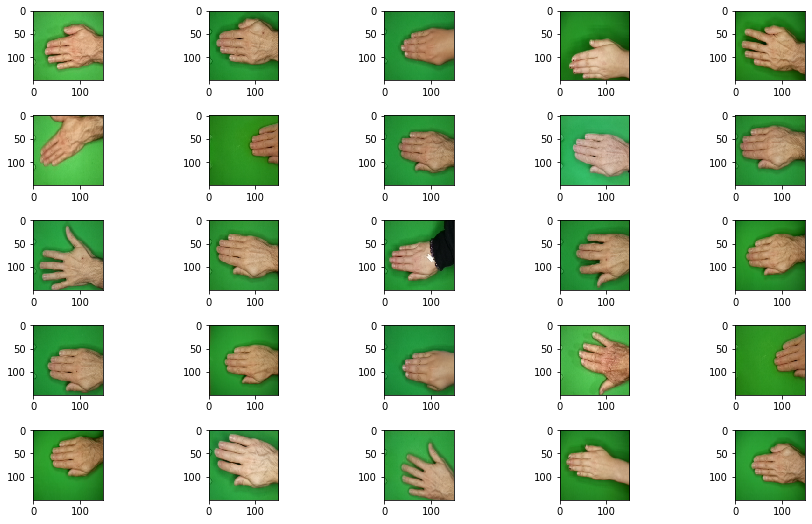

In [50]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(25):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data[i])
#     plt.title()
#     plt.title(f'Label: {mapping[labels[i]]}')

In [55]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)


In [56]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")


model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               21234176  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [60]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),
              validation_data=(testx,testy),
              epochs=20)

  ...
    to  
  ['...']
Train for 55 steps, validate on 438 samples
Epoch 1/20
55/55 [==============================] - 38s 693ms/step - loss: 1.2521 - accuracy: 0.4234 - val_loss: 1.0498 - val_accuracy: 0.5388
Epoch 2/20
55/55 [==============================] - 70s 1s/step - loss: 1.0065 - accuracy: 0.5080 - val_loss: 0.7101 - val_accuracy: 0.7169
Epoch 3/20
55/55 [==============================] - 148s 3s/step - loss: 0.7822 - accuracy: 0.6674 - val_loss: 0.3624 - val_accuracy: 0.8858
Epoch 4/20
55/55 [==============================] - 89s 2s/step - loss: 0.6238 - accuracy: 0.7457 - val_loss: 0.3819 - val_accuracy: 0.9041
Epoch 5/20
55/55 [==============================] - 35s 634ms/step - loss: 0.5504 - accuracy: 0.7886 - val_loss: 0.2582 - val_accuracy: 0.9361
Epoch 6/20
55/55 [==============================] - 35s 628ms/step - loss: 0.4786 - accuracy: 0.8063 - val_loss: 0.2137 - val_accuracy: 0.9589
Epoch 7/20
55/55 [==============================] - 34s 615ms/step - loss: 0.3974

In [62]:
y_pred=model.predict(testx)
y_pred

array([[9.9868542e-01, 1.0433161e-03, 2.7133932e-04],
       [5.0634900e-03, 9.9459261e-01, 3.4378885e-04],
       [9.7221625e-04, 3.5160651e-06, 9.9902427e-01],
       ...,
       [9.9061346e-01, 9.0789525e-03, 3.0760685e-04],
       [8.4383653e-05, 9.9989760e-01, 1.7956501e-05],
       [4.7500354e-01, 4.8134571e-01, 4.3650810e-02]], dtype=float32)

In [64]:
pred=np.argmax(y_pred,axis=1)
pred

array([0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1,
       1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0,
       1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1,
       2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2,

In [66]:
ground = np.argmax(testy,axis=1)

In [116]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       139
           1       0.94      1.00      0.97       140
           2       1.00      0.99      1.00       159

    accuracy                           0.98       438
   macro avg       0.98      0.98      0.98       438
weighted avg       0.98      0.98      0.98       438



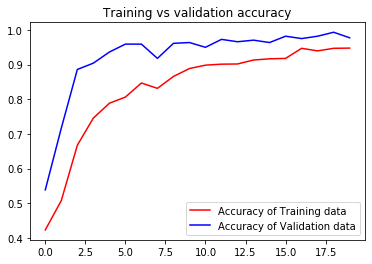

<Figure size 432x288 with 0 Axes>

In [73]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

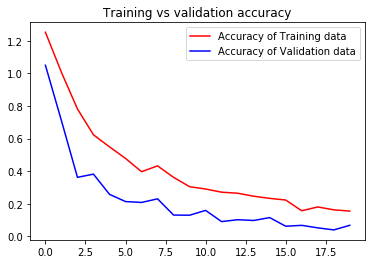

<Figure size 432x288 with 0 Axes>

In [74]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Accuracy of Training data')
plt.plot(epochs, validation_loss, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [134]:


prediction_image=cv2.imread(os.path.join(directory,'paper','0a3UtNzl5Ll3sq8K.png'))
# print(prediction_image)
prediction_image=cv2.cvtColor(prediction_image,cv2.COLOR_BGR2RGB)
prediction_image=cv2.resize(prediction_image,(150,150))
prediction_image=prediction_image/255.0
cv2.imshow("paper",prediction_image)
cv2.waitKey(0)  
  
#closing all open windows  
cv2.destroyAllWindows() 

In [135]:
reverse_mapping={0:'paper',1:'rock',1:'scissors'}

def mapper(value):
    return reverse_mapping[value]

In [136]:
prediction_image=np.array(prediction_image)
prediction_image= np.expand_dims(prediction_image, axis=0)
prediction_image.shape

(1, 150, 150, 3)

In [137]:
# builtin_function_or_method' object is not subscriptable
# e=
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("PREDICTION IS {}".format(move_name))

PREDICTION IS paper
